# Importando bibliotecas e dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UFSC (12019-12023)/PIC/Cmos Data/simu0/joined_data.csv', na_values='failed')
data.iloc[153690:153700]

,index,nmos@var,pmos@varp,tphl,tplh,iint,temper,alter,tensao
153690,691,0.5269,-0.4503,failed,failed,-1.415000e-09,50.0,6,0.9
153691,692,0.4930,-0.4487,failed,failed,-1.388000e-09,50.0,6,0.9
153692,693,0.5203,-0.4868,failed,failed,-1.410000e-09,50.0,6,0.9
153693,694,0.5292,-0.4280,failed,failed,-1.417000e-09,50.0,6,0.9
153694,695,0.5264,-0.4461,failed,failed,-1.415000e-09,50.0,6,0.9
153695,696,0.5005,-0.4284,failed,failed,-1.394000e-09,50.0,6,0.9
153696,697,0.5020,-0.4467,failed,failed,-1.395000e-09,50.0,6,0.9
153697,698,0.4935,-0.4469,failed,failed,-1.389000e-09,50.0,6,0.9
153698,699,0.5007,-0.4575,failed,failed,-1.394000e-09,50.0,6,0.9
153699,700,0.5281,-0.4640,failed,failed,-1.417000e-09,50.0,6,0.9


In [ ]:
data.dtypes

index          int64
nmos@var     float64
pmos@varp    float64
tphl          object
tplh          object
iint         float64
temper       float64
alter          int64
tensao       float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168000 entries, 0 to 167999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   index      168000 non-null  int64  
 1   nmos@var   168000 non-null  float64
 2   pmos@varp  168000 non-null  float64
 3   tphl       168000 non-null  object 
 4   tplh       168000 non-null  object 
 5   iint       168000 non-null  float64
 6   temper     168000 non-null  float64
 7   alter      168000 non-null  int64  
 8   tensao     168000 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 11.5+ MB


In [ ]:
data.describe()

,index,nmos@var,pmos@varp,iint,temper,alter,tensao
count,168000.000000,168000.000000,168000.000000,1.680000e+05,168000.000000,168000.000000,168000.000000
mean,500.500000,0.509033,-0.450689,-1.904696e-03,37.500000,4.000000,0.750000
std,288.675849,0.016785,0.015277,1.944617e-01,42.695755,2.000006,0.111804
min,1.000000,0.461300,-0.493300,-3.342370e+01,-25.000000,1.000000,0.600000
25%,250.750000,0.497775,-0.461900,-2.681000e-15,0.000000,2.000000,0.675000
50%,500.500000,0.508850,-0.450500,-1.713000e-15,37.500000,4.000000,0.750000
75%,750.250000,0.520125,-0.440300,-1.366000e-15,75.000000,6.000000,0.825000
max,1000.000000,0.586100,-0.405800,2.933300e+01,100.000000,7.000000,0.900000


In [ ]:
data.head()

,index,nmos@var,pmos@varp,tphl,tplh,iint,temper,alter,tensao
0,1,0.5166,-0.4341,9.607000000000001e-12,8.368e-12,-1.330000e-15,-25.0,1,0.6
1,2,0.5064,-0.4523,9.423999999999999e-12,8.791e-12,-1.337000e-15,-25.0,1,0.6
2,3,0.4909,-0.4618,9.156e-12,9.046e-12,-1.388000e-15,-25.0,1,0.6
3,4,0.4882,-0.4667,9.111e-12,9.161e-12,-1.395000e-15,-25.0,1,0.6
4,5,0.5275,-0.4342,9.808999999999997e-12,8.898999999999999e-12,-1.351000e-15,-25.0,1,0.6


# Limpando e Ajustando Dados

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(data.iint)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.006, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
data.loc[data.alter == 1, ['width_pmos', 'width_nmos', 'length_n&p']] = 140e-9, 70e-9, 32e-9
data.loc[data.alter == 2, ['width_pmos', 'width_nmos', 'length_n&p']] = 70e-9, 70e-9, 32e-9
data.loc[data.alter == 3, ['width_pmos', 'width_nmos', 'length_n&p']] = 280e-9, 70e-9, 32e-9
data.loc[data.alter == 4, ['width_pmos', 'width_nmos', 'length_n&p']] = 350e-9, 70e-9, 32e-9
data.loc[data.alter == 5, ['width_pmos', 'width_nmos', 'length_n&p']] = 420e-9, 140e-9, 32e-9
data.loc[data.alter == 6, ['width_pmos', 'width_nmos', 'length_n&p']] = 140e-9, 70e-9, 20e-9
data.loc[data.alter == 7, ['width_pmos', 'width_nmos', 'length_n&p']] = 140e-9, 70e-9, 40e-9
data.head()

,index,nmos@var,pmos@varp,tphl,tplh,iint,temper,alter,tensao,width_pmos,width_nmos,length_n&p
0,1,0.5166,-0.4341,9.607000000000001e-12,8.368e-12,-1.330000e-15,-25.0,1,0.6,1.400000e-07,7.000000e-08,3.200000e-08
1,2,0.5064,-0.4523,9.423999999999999e-12,8.791e-12,-1.337000e-15,-25.0,1,0.6,1.400000e-07,7.000000e-08,3.200000e-08
2,3,0.4909,-0.4618,9.156e-12,9.046e-12,-1.388000e-15,-25.0,1,0.6,1.400000e-07,7.000000e-08,3.200000e-08
3,4,0.4882,-0.4667,9.111e-12,9.161e-12,-1.395000e-15,-25.0,1,0.6,1.400000e-07,7.000000e-08,3.200000e-08
4,5,0.5275,-0.4342,9.808999999999997e-12,8.898999999999999e-12,-1.351000e-15,-25.0,1,0.6,1.400000e-07,7.000000e-08,3.200000e-08


In [ ]:
df = data.copy()

In [ ]:
df = df.drop('alter',axis=1)
df = df.drop('index',axis=1)

In [ ]:
print(df.shape)
df.isna().sum()

(168000, 10)


nmos@var      0
pmos@varp     0
tphl          0
tplh          0
iint          0
temper        0
tensao        0
width_pmos    0
width_nmos    0
length_n&p    0
dtype: int64

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
print(df.shape)
print(df.isna().sum())
df.describe()

(155077, 10)
nmos@var      0
pmos@varp     0
tphl          0
tplh          0
iint          0
temper        0
tensao        0
width_pmos    0
width_nmos    0
length_n&p    0
dtype: int64


,nmos@var,pmos@varp,tphl,tplh,iint,temper,tensao,width_pmos,width_nmos,length_n&p
count,155077.000000,155077.000000,1.550770e+05,1.550770e+05,1.550770e+05,155077.000000,155077.000000,1.550770e+05,1.550770e+05,1.550770e+05
mean,0.509108,-0.450684,6.592126e-11,-6.440956e-10,-2.063419e-03,37.467033,0.750069,2.266666e-07,8.083333e-08,3.238095e-08
std,0.016825,0.015274,7.263116e-10,2.477490e-09,2.024013e-01,42.982289,0.111693,1.234463e-07,2.531751e-08,4.477225e-09
min,0.461300,-0.493300,-3.819000e-12,-1.000000e-08,-3.342370e+01,-25.000000,0.600000,7.000000e-08,7.000000e-08,2.000000e-08
25%,0.497800,-0.461900,9.825000e-12,7.604000e-12,-2.351000e-15,0.000000,0.700000,1.400000e-07,7.000000e-08,3.200000e-08
50%,0.509000,-0.450500,1.226000e-11,1.080000e-11,-1.657000e-15,50.000000,0.800000,1.400000e-07,7.000000e-08,3.200000e-08
75%,0.520200,-0.440300,1.476000e-11,1.874000e-11,-1.336000e-15,75.000000,0.800000,3.500000e-07,7.000000e-08,3.200000e-08
max,0.586100,-0.405800,1.018000e-08,2.631000e-10,2.933300e+01,100.000000,0.900000,4.200000e-07,1.400000e-07,4.000000e-08


In [ ]:
df.dtypes

nmos@var      float64
pmos@varp     float64
tphl          float64
tplh          float64
iint          float64
temper        float64
tensao        float64
width_pmos    float64
width_nmos    float64
length_n&p    float64
dtype: object

In [ ]:
#data.iint.describe([0.1, 0.9])
#test = data.copy()
df = df[(df.iint.quantile(0.25) < df.iint) & (df.iint < df.iint.quantile(0.97))] #deixei esse valor devido ao num de obs > 10000
df.describe() #tirei 47.046 obs (28%)

,nmos@var,pmos@varp,tphl,tplh,iint,temper,tensao,width_pmos,width_nmos,length_n&p
count,111645.000000,111645.000000,1.116450e+05,1.116450e+05,1.116450e+05,111645.000000,111645.000000,1.116450e+05,1.116450e+05,1.116450e+05
mean,0.510202,-0.451378,1.639164e-11,1.052530e-11,7.645536e-11,27.985579,0.748259,2.037069e-07,7.635891e-08,3.370877e-08
std,0.016657,0.015185,1.819795e-10,2.404947e-10,3.246517e-09,40.999934,0.103579,1.162254e-07,2.011694e-08,3.312045e-09
min,0.461300,-0.493300,9.326000e-13,-9.998000e-09,-2.350000e-15,-25.000000,0.600000,7.000000e-08,7.000000e-08,2.000000e-08
25%,0.499100,-0.462400,1.041000e-11,8.688000e-12,-1.768000e-15,0.000000,0.700000,1.400000e-07,7.000000e-08,3.200000e-08
50%,0.509700,-0.451300,1.253000e-11,1.358000e-11,-1.517000e-15,25.000000,0.700000,1.400000e-07,7.000000e-08,3.200000e-08
75%,0.521000,-0.440900,1.515000e-11,2.121000e-11,-1.279000e-15,50.000000,0.800000,2.800000e-07,7.000000e-08,3.200000e-08
max,0.586100,-0.405800,1.002000e-08,1.666000e-10,2.362000e-07,100.000000,0.900000,4.200000e-07,1.400000e-07,4.000000e-08


(array([1.00000e+00, 2.00000e+00, 2.00000e+00, 5.00000e+00, 5.10000e+01,
        1.67931e+05, 3.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([-33.4237 , -27.14803, -20.87236, -14.59669,  -8.32102,  -2.04535,
          4.23032,  10.50599,  16.78166,  23.05733,  29.333  ]),
 <a list of 10 Patch objects>)

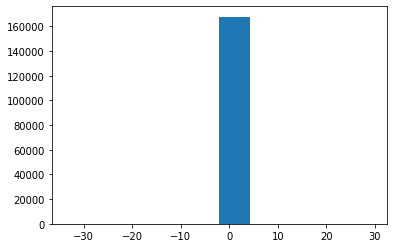

In [ ]:
plt.hist(data.iint)

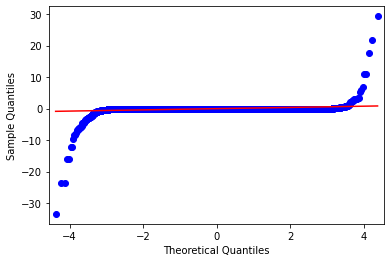

In [ ]:
qqplot(data.iint, line='s')
plt.show()

Transformando para nparray

In [ ]:
#df = np.array(df)

######Encoding

In [ ]:
print(df)

        nmos@var  pmos@varp  ...    width_nmos    length_n&p
0         0.5166    -0.4341  ...  7.000000e-08  3.200000e-08
1         0.5064    -0.4523  ...  7.000000e-08  3.200000e-08
2         0.4909    -0.4618  ...  7.000000e-08  3.200000e-08
3         0.4882    -0.4667  ...  7.000000e-08  3.200000e-08
4         0.5275    -0.4342  ...  7.000000e-08  3.200000e-08
...          ...        ...  ...           ...           ...
167995    0.5126    -0.4225  ...  7.000000e-08  3.200000e-08
167996    0.4847    -0.4406  ...  7.000000e-08  3.200000e-08
167997    0.4997    -0.4561  ...  7.000000e-08  3.200000e-08
167998    0.5154    -0.4417  ...  7.000000e-08  3.200000e-08
167999    0.4994    -0.4547  ...  7.000000e-08  3.200000e-08

[111645 rows x 10 columns]


Codificando as variáveis categóricas (temper, tensão, w_pmos, w_nmos, len)

In [ ]:
categoricas = df[:,5:]
print(categoricas)

TypeError: ignored

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
CT = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), slice(0,-1))], remainder='passthrough')
categoricas = np.array(CT.fit_transform(categoricas))

In [ ]:
print(pd.DataFrame(df))

# Explorando os dados


In [ ]:
correlacao = df.corr()
correlacao

,nmos@var,pmos@varp,tphl,tplh,iint,temper,tensao,width_pmos,width_nmos,length_n&p
nmos@var,1.000000,0.029849,-0.004863,-0.001853,-0.004581,0.057554,0.006099,0.034753,0.038429,-0.036021
pmos@varp,0.029849,1.000000,-0.000364,-0.002376,-0.000497,-0.020932,-0.004475,-0.043752,-0.028612,0.023647
tphl,-0.004863,-0.000364,1.000000,0.001159,0.339023,0.016985,-0.000091,-0.008367,-0.012417,-0.071071
tplh,-0.001853,-0.002376,0.001159,1.000000,-0.719017,0.027917,-0.003787,-0.015382,-0.003630,0.104169
iint,-0.004581,-0.000497,0.339023,-0.719017,1.000000,0.002205,0.002410,-0.012909,-0.007444,-0.097478
temper,0.057554,-0.020932,0.016985,0.027917,0.002205,1.000000,-0.020292,-0.196567,-0.156544,0.120301
tensao,0.006099,-0.004475,-0.000091,-0.003787,0.002410,-0.020292,1.000000,-0.022996,-0.022100,0.008452
width_pmos,0.034753,-0.043752,-0.008367,-0.015382,-0.012909,-0.196567,-0.022996,1.000000,0.588255,-0.282799
width_nmos,0.038429,-0.028612,-0.012417,-0.003630,-0.007444,-0.156544,-0.022100,0.588255,1.000000,-0.163084
length_n&p,-0.036021,0.023647,-0.071071,0.104169,-0.097478,0.120301,0.008452,-0.282799,-0.163084,1.000000


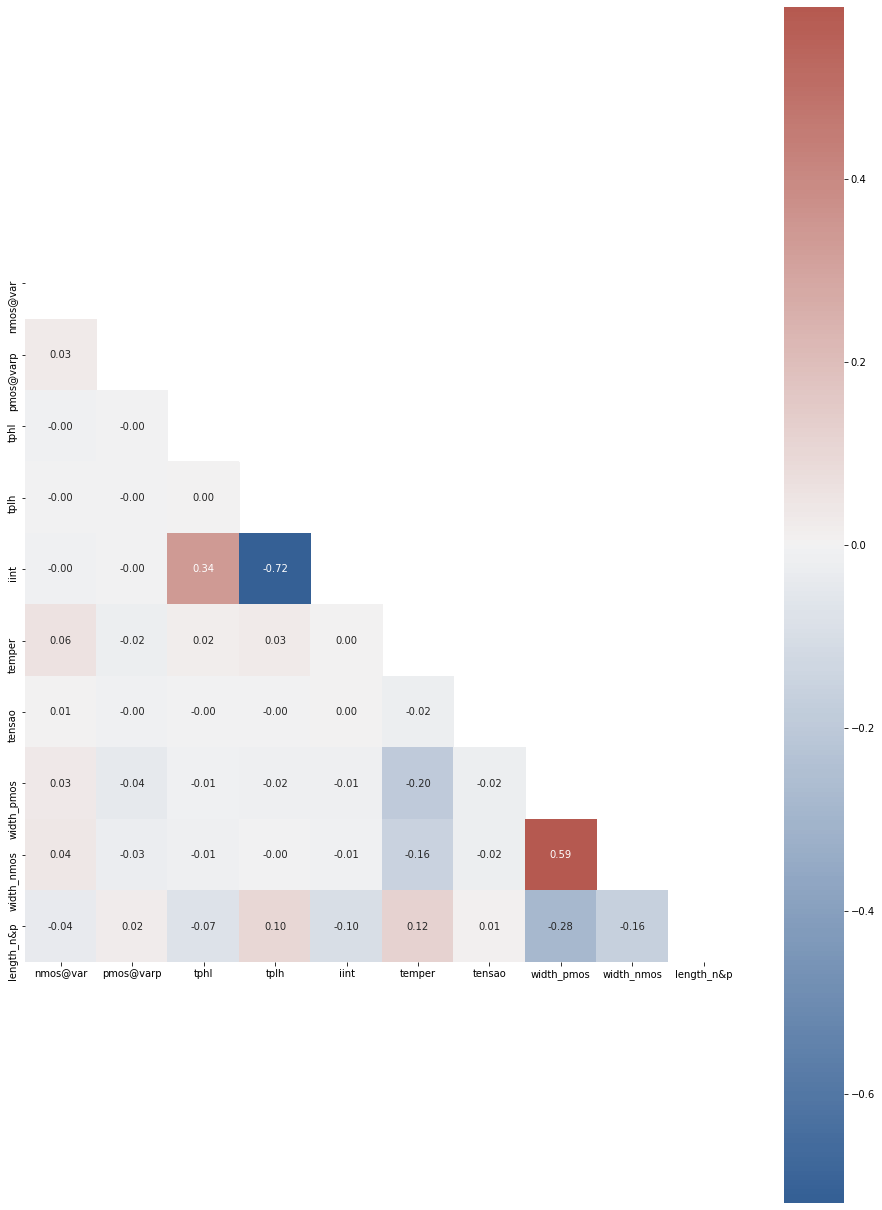

In [ ]:
# Create a mask
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 22))

sns.heatmap(correlacao, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

plt.show();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36c6355c90>,
      dtype=object)

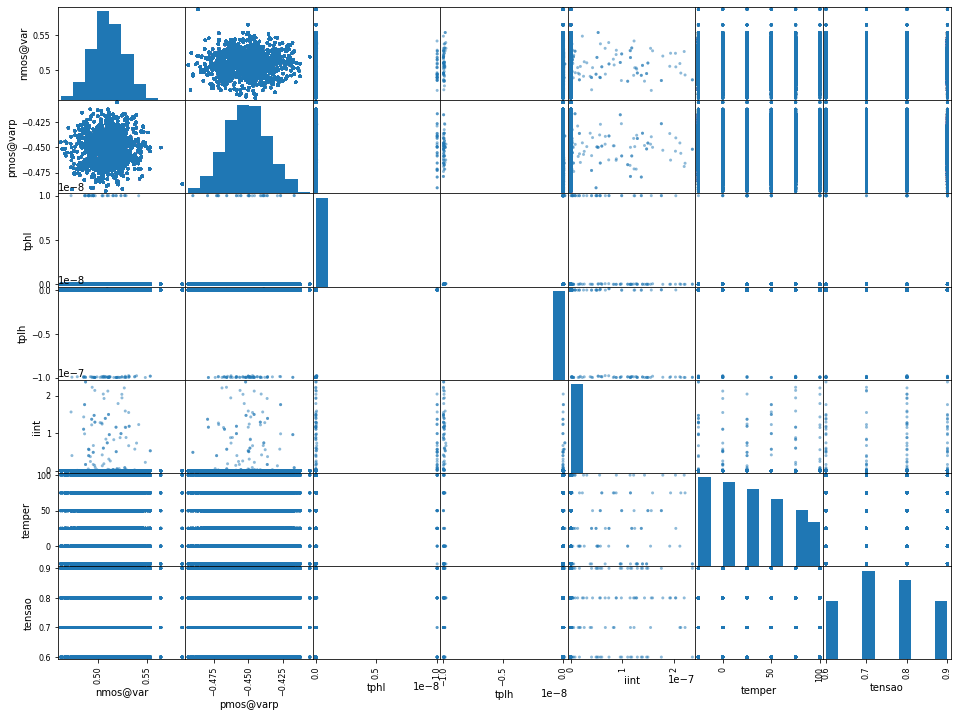

In [ ]:
from pandas.plotting import scatter_matrix
atrib = ['nmos@var', 'pmos@varp', 'tphl', 'tplh', 'iint', 'temper', 'tensao']
scatter_matrix(df[atrib], figsize=(16,12))

# Criando sub-datasets


In [ ]:
df_energia = df.copy()
#df_energia = df_energia.drop("tphl",axis=1)
#df_energia = df_energia.drop("tplh",axis=1)
df_energia

,nmos@var,pmos@varp,tphl,tplh,iint,temper,tensao,width_pmos,width_nmos,length_n&p
0,0.5166,-0.4341,9.607000e-12,8.368000e-12,-1.330000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
1,0.5064,-0.4523,9.424000e-12,8.791000e-12,-1.337000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
2,0.4909,-0.4618,9.156000e-12,9.046000e-12,-1.388000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
3,0.4882,-0.4667,9.111000e-12,9.161000e-12,-1.395000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
4,0.5275,-0.4342,9.809000e-12,8.899000e-12,-1.351000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
...,...,...,...,...,...,...,...,...,...,...
167995,0.5126,-0.4225,9.682000e-12,2.399000e-11,-1.790000e-15,50.0,0.9,7.000000e-08,7.000000e-08,3.200000e-08
167996,0.4847,-0.4406,9.130000e-12,2.513000e-11,-2.135000e-15,50.0,0.9,7.000000e-08,7.000000e-08,3.200000e-08
167997,0.4997,-0.4561,9.415000e-12,2.639000e-11,-1.833000e-15,50.0,0.9,7.000000e-08,7.000000e-08,3.200000e-08
167998,0.5154,-0.4417,9.738000e-12,2.516000e-11,-1.677000e-15,50.0,0.9,7.000000e-08,7.000000e-08,3.200000e-08


In [ ]:
df_lowhigh = df.copy()
#df_lowhigh = df_lowhigh.drop("tphl",axis=1)
#df_lowhigh = df_lowhigh.drop("iint",axis=1)
df_lowhigh

,nmos@var,pmos@varp,tphl,tplh,iint,temper,tensao,width_pmos,width_nmos,length_n&p
0,0.5166,-0.4341,9.607000e-12,8.368000e-12,-1.330000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
1,0.5064,-0.4523,9.424000e-12,8.791000e-12,-1.337000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
2,0.4909,-0.4618,9.156000e-12,9.046000e-12,-1.388000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
3,0.4882,-0.4667,9.111000e-12,9.161000e-12,-1.395000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
4,0.5275,-0.4342,9.809000e-12,8.899000e-12,-1.351000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
...,...,...,...,...,...,...,...,...,...,...
167995,0.5126,-0.4225,9.682000e-12,2.399000e-11,-1.790000e-15,50.0,0.9,7.000000e-08,7.000000e-08,3.200000e-08
167996,0.4847,-0.4406,9.130000e-12,2.513000e-11,-2.135000e-15,50.0,0.9,7.000000e-08,7.000000e-08,3.200000e-08
167997,0.4997,-0.4561,9.415000e-12,2.639000e-11,-1.833000e-15,50.0,0.9,7.000000e-08,7.000000e-08,3.200000e-08
167998,0.5154,-0.4417,9.738000e-12,2.516000e-11,-1.677000e-15,50.0,0.9,7.000000e-08,7.000000e-08,3.200000e-08


In [ ]:
df_highlow = df.copy()
#df_highlow = df_highlow.drop("tplh",axis=1)
#df_highlow = df_highlow.drop("iint",axis=1)
df_highlow

,nmos@var,pmos@varp,tphl,tplh,iint,temper,tensao,width_pmos,width_nmos,length_n&p
0,0.5166,-0.4341,9.607000e-12,8.368000e-12,-1.330000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
1,0.5064,-0.4523,9.424000e-12,8.791000e-12,-1.337000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
2,0.4909,-0.4618,9.156000e-12,9.046000e-12,-1.388000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
3,0.4882,-0.4667,9.111000e-12,9.161000e-12,-1.395000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
4,0.5275,-0.4342,9.809000e-12,8.899000e-12,-1.351000e-15,-25.0,0.6,1.400000e-07,7.000000e-08,3.200000e-08
...,...,...,...,...,...,...,...,...,...,...
167995,0.5126,-0.4225,9.682000e-12,2.399000e-11,-1.790000e-15,50.0,0.9,7.000000e-08,7.000000e-08,3.200000e-08
167996,0.4847,-0.4406,9.130000e-12,2.513000e-11,-2.135000e-15,50.0,0.9,7.000000e-08,7.000000e-08,3.200000e-08
167997,0.4997,-0.4561,9.415000e-12,2.639000e-11,-1.833000e-15,50.0,0.9,7.000000e-08,7.000000e-08,3.200000e-08
167998,0.5154,-0.4417,9.738000e-12,2.516000e-11,-1.677000e-15,50.0,0.9,7.000000e-08,7.000000e-08,3.200000e-08


#Training Testing Fitting Models



### **Atraso High Low**


In [ ]:
from sklearn.model_selection import train_test_split
XHL = df_highlow.drop('tphl', axis=1)
yHL = df_highlow.iloc[:,2]
XHL_train, XHL_test, yHL_train, yHL_test = train_test_split(XHL, yHL, random_state=42)

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
XHL_train = SC.fit_transform(XHL_train)
XHL_test = SC.transform(XHL_test)



#### Modelos





##### Regressor Linear Polinomial

In [ ]:
from sklearn.linear_model import LinearRegression
HL_regressor_linear = LinearRegression()
HL_regressor_linear.fit(XHL_train, yHL_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 4)
X_poly = poly_regressor.fit_transform(XHL_train)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_poly, yHL_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_HL_lin_reg = HL_regressor_linear.predict(XHL_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_HL_lin_reg = mean_squared_error(yHL_test, y_pred_HL_lin_reg)
rmse_HL_lin_reg = np.sqrt(mse_HL_lin_reg)

mae_HL_lin_reg = mean_absolute_error(yHL_test, y_pred_HL_lin_reg)

print(rmse_HL_lin_reg, mae_HL_lin_reg)

1.625205898978986e-10 1.3663386480218465e-11


#####SVR

In [ ]:
from sklearn.svm import SVR
HL_SVR_reg = SVR(kernel = 'poly')
HL_SVR_reg.fit(XHL_train, yHL_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_HL_SVR_reg = HL_SVR_reg.predict(XHL_test)

In [ ]:
mse_HL_SVR_reg = mean_squared_error(yHL_test, y_pred_HL_SVR_reg)
rmse_HL_SVR_reg = np.sqrt(mse_HL_SVR_reg)

mae_HL_SVR_reg = mean_absolute_error(yHL_test, y_pred_HL_SVR_reg)

print(rmse_HL_SVR_reg, mae_HL_SVR_reg)

4.99735772645874e-09 4.997356504294311e-09


#####Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
HL_DT_reg = DecisionTreeRegressor(random_state=42)
HL_DT_reg.fit(XHL_train, yHL_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_pred_HL_DT_reg = HL_DT_reg.predict(XHL_test)

In [ ]:
mse_HL_DT_reg = mean_squared_error(yHL_test, y_pred_HL_DT_reg)
rmse_HL_DT_reg = np.sqrt(mse_HL_DT_reg)

mae_HL_DT_reg = mean_absolute_error(yHL_test, y_pred_HL_DT_reg)

print(rmse_HL_DT_reg, mae_HL_DT_reg)

1.7949599554162155e-10 7.355822659526809e-12


#####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
HL_RF_regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
HL_RF_regressor.fit(XHL_train, yHL_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred_HL_RF_regressor = HL_RF_regressor.predict(XHL_test)

In [ ]:
mse_HL_RF_reg = mean_squared_error(yHL_test, y_pred_HL_RF_regressor)
rmse_HL_RF_reg = np.sqrt(mse_HL_RF_reg)

mae_HL_RF_reg = mean_absolute_error(yHL_test, y_pred_HL_RF_regressor)

print(rmse_HL_RF_reg, mae_HL_RF_reg)

1.7949599949453797e-10 7.2472280360555186e-12


####**Comparando Erros**

In [ ]:
valores = {"Modelo": ['Regressor Linear','Support Vector Regression (Poly Kernel)', 'Decision Trees', 'Random Forest'],
           "Raiz quadrada do erro-médio": [rmse_HL_lin_reg, rmse_HL_SVR_reg, rmse_HL_DT_reg, rmse_HL_RF_reg],
           "Erro médio Absoluto": [mae_HL_lin_reg, mae_HL_SVR_reg, mae_HL_DT_reg, mae_HL_RF_reg]}
HL_tabela_erros = pd.DataFrame(valores, columns=["Modelo", "Raiz quadrada do erro-médio", "Erro médio Absoluto"])
HL_tabela_erros

,Modelo,Raiz quadrada do erro-médio,Erro médio Absoluto
0,Regressor Linear,1.625206e-10,1.366339e-11
1,Support Vector Regression (Poly Kernel),4.997358e-09,4.997357e-09
2,Decision Trees,1.794960e-10,7.355823e-12
3,Random Forest,1.794960e-10,7.247228e-12


### **Atraso Low High**

In [ ]:
XLH = df_lowhigh.drop('tplh', axis=1)
yLH = df_lowhigh.iloc[:,3]
XLH_train, XLH_test, yLH_train, yLH_test = train_test_split(XLH, yLH, random_state=42)

Scaling


In [ ]:
XLH_train = SC.fit_transform(XLH_train)
XLH_test = SC.transform(XLH_test)



#### Modelos





##### Regressor Linear Polinomial


In [ ]:
LH_regressor_linear = LinearRegression()
LH_regressor_linear.fit(XLH_train, yLH_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_LH_regressor_linear = LH_regressor_linear.predict(XLH_test)

In [ ]:
mse_LH_regressor_linear = mean_squared_error(yLH_test, y_pred_LH_regressor_linear)
rmse_LH_regressor_linear = np.sqrt(mse_LH_regressor_linear)

mae_LH_regressor_linear = mean_absolute_error(yLH_test, y_pred_LH_regressor_linear)

print(rmse_LH_regressor_linear, mae_LH_regressor_linear)

1.4209769531818748e-10 1.3352169029094939e-11


#####SVR

In [ ]:
LH_SVR_reg = SVR(kernel = 'poly')
LH_SVR_reg.fit(XLH_train, yLH_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_LH_SVR_reg = LH_SVR_reg.predict(XLH_test)

In [ ]:
mse_LH_SVR_reg = mean_squared_error(yLH_test, y_pred_LH_SVR_reg)
rmse_LH_SVR_reg = np.sqrt(mse_LH_SVR_reg)

mae_LH_SVR_reg = mean_absolute_error(yLH_test, y_pred_LH_SVR_reg)

print(rmse_LH_SVR_reg, mae_LH_SVR_reg)

4.9310778433734524e-09 4.931066968674926e-09


#####Decision Trees

In [ ]:
LH_DT_reg = DecisionTreeRegressor(random_state=42)
LH_DT_reg.fit(XLH_train, yLH_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_pred_LH_DT_reg = LH_DT_reg.predict(XLH_test)

In [ ]:
mse_LH_DT_reg = mean_squared_error(yLH_test, y_pred_LH_DT_reg)
rmse_LH_DT_reg = np.sqrt(mse_LH_DT_reg)

mae_LH_DT_reg = mean_absolute_error(yLH_test, y_pred_LH_DT_reg)

print(rmse_LH_DT_reg, mae_LH_DT_reg)

2.149075225964306e-10 1.2630613578685058e-11


#####Random Forest

In [ ]:
LH_RF_regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
LH_RF_regressor.fit(XLH_train, yLH_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred_LH_RF_regressor = LH_RF_regressor.predict(XLH_test)

In [ ]:
mse_LH_RF_reg = mean_squared_error(yLH_test, y_pred_LH_RF_regressor)
rmse_LH_RF_reg = np.sqrt(mse_LH_RF_reg)

mae_LH_RF_reg = mean_absolute_error(yLH_test, y_pred_LH_RF_regressor)

print(rmse_LH_RF_reg, mae_LH_RF_reg)

2.1490772037526226e-10 1.263955054017063e-11


####**Comparando Erros**

In [ ]:
valores = {"Modelo": ['Regressor Linear','Support Vector Regression (Poly Kernel)', 'Decision Trees', 'Random Forest'],
           "Raiz quadrada do erro-médio": [rmse_LH_regressor_linear, rmse_LH_SVR_reg, rmse_LH_DT_reg, rmse_LH_RF_reg],
           "Erro médio Absoluto": [mae_LH_regressor_linear, mae_LH_SVR_reg, mae_LH_DT_reg, mae_LH_RF_reg]}
LH_tabela_erros = pd.DataFrame(valores, columns=["Modelo", "Raiz quadrada do erro-médio", "Erro médio Absoluto"])
LH_tabela_erros

,Modelo,Raiz quadrada do erro-médio,Erro médio Absoluto
0,Regressor Linear,1.420977e-10,1.335217e-11
1,Support Vector Regression (Poly Kernel),4.931078e-09,4.931067e-09
2,Decision Trees,2.149075e-10,1.263061e-11
3,Random Forest,2.149077e-10,1.263955e-11


### **Energia**

In [ ]:
Xiint = df_energia.drop('iint', axis=1)
yiint = df_energia.iloc[:,4]
Xiint_train, Xiint_test, yiint_train, yiint_test = train_test_split(Xiint, yiint, random_state=42)

Scaling


In [ ]:
Xiint_train = SC.fit_transform(Xiint_train)
Xiint_test = SC.transform(Xiint_test)



#### Modelos





#####Regressor Linear Polinomial


In [ ]:
iint_regressor_linear = LinearRegression()
iint_regressor_linear.fit(Xiint_train, yiint_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_iint_regressor_linear = iint_regressor_linear.predict(Xiint_test)

In [ ]:
mse_iint_regressor_linear = mean_squared_error(yiint_test, y_pred_iint_regressor_linear)
rmse_iint_regressor_linear = np.sqrt(mse_iint_regressor_linear)

mae_iint_regressor_linear = mean_absolute_error(yiint_test, y_pred_iint_regressor_linear)

print(rmse_iint_regressor_linear, mae_iint_regressor_linear)

1.5746201837659063e-09 7.496521013664464e-11


#####SVR

In [ ]:
iint_SVR_reg = SVR(kernel = 'poly')
iint_SVR_reg.fit(Xiint_train, yiint_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_iint_SVR_reg = iint_SVR_reg.predict(Xiint_test)

In [ ]:
mse_iint_SVR_reg = mean_squared_error(yiint_test, y_pred_iint_SVR_reg)
rmse_iint_SVR_reg = np.sqrt(mse_iint_SVR_reg)

mae_iint_SVR_reg = mean_absolute_error(yiint_test, y_pred_iint_SVR_reg)

print(rmse_iint_SVR_reg, mae_iint_SVR_reg)

1.1807324728554059e-07 1.1806029827300615e-07


#####Decision Trees

In [ ]:
iint_DT_reg = DecisionTreeRegressor(random_state=42)
iint_DT_reg.fit(Xiint_train, yiint_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_pred_iint_DT_reg = iint_DT_reg.predict(Xiint_test)

In [ ]:
mse_iint_DT_reg = mean_squared_error(yiint_test, y_pred_iint_DT_reg)
rmse_iint_DT_reg = np.sqrt(mse_iint_DT_reg)

mae_iint_DT_reg = mean_absolute_error(yiint_test, y_pred_iint_DT_reg)

print(rmse_iint_DT_reg, mae_iint_DT_reg)

2.393080852705394e-09 1.3581021086252992e-10


#####Random Forest

In [ ]:
iint_RF_regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
iint_RF_regressor.fit(Xiint_train, yiint_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred_iint_RF_regressor = iint_RF_regressor.predict(Xiint_test)

In [ ]:
mse_iint_RF_reg = mean_squared_error(yiint_test, y_pred_iint_RF_regressor)
rmse_iint_RF_reg = np.sqrt(mse_iint_RF_reg)

mae_iint_RF_reg = mean_absolute_error(yiint_test, y_pred_iint_RF_regressor)

print(rmse_iint_RF_reg, mae_iint_RF_reg)

2.39307471627298e-09 1.3537543360638157e-10


####**Comparando Erros**

In [ ]:
valores = {"Modelo": ['Regressor Linear','Support Vector Regression (Poly Kernel)', 'Decision Trees', 'Random Forest'],
           "Raiz quadrada do erro-médio": [rmse_iint_regressor_linear, rmse_iint_SVR_reg, rmse_iint_DT_reg, rmse_iint_RF_reg],
           "Erro médio Absoluto": [mae_iint_regressor_linear, mae_iint_SVR_reg, mae_iint_DT_reg, mae_iint_RF_reg]}
iint_tabela_erros = pd.DataFrame(valores, columns=["Modelo", "Raiz quadrada do erro-médio", "Erro médio Absoluto"])
iint_tabela_erros

,Modelo,Raiz quadrada do erro-médio,Erro médio Absoluto
0,Regressor Linear,1.574620e-09,7.496521e-11
1,Support Vector Regression (Poly Kernel),1.180732e-07,1.180603e-07
2,Decision Trees,2.393081e-09,1.358102e-10
3,Random Forest,2.393075e-09,1.353754e-10


#Overall Analysis


In [ ]:
iint_tabela_erros, LH_tabela_erros, HL_tabela_erros

(                                    Modelo  ...  Erro médio Absoluto
 0                         Regressor Linear  ...         7.496521e-11
 1  Support Vector Regression (Poly Kernel)  ...         1.180603e-07
 2                           Decision Trees  ...         1.358102e-10
 3                            Random Forest  ...         1.353754e-10
 
 [4 rows x 3 columns],
                                     Modelo  ...  Erro médio Absoluto
 0                         Regressor Linear  ...         1.335217e-11
 1  Support Vector Regression (Poly Kernel)  ...         4.931067e-09
 2                           Decision Trees  ...         1.263061e-11
 3                            Random Forest  ...         1.263955e-11
 
 [4 rows x 3 columns],
                                     Modelo  ...  Erro médio Absoluto
 0                         Regressor Linear  ...         1.366339e-11
 1  Support Vector Regression (Poly Kernel)  ...         4.997357e-09
 2                           Decision Tr

In [ ]:
from sklearn.metrics import r2_score
score = pd.DataFrame(columns=['Regressor Linear', 'SVR', 'Decision Trees', 'Random Forest'], index=['TPHL', 'TPLH', 'IINT'])

In [ ]:
def generate_scores(metric):
  result = pd.DataFrame(columns=['Regressor Linear', 'SVR', 'Decision Trees', 'Random Forest'], index=['TPHL', 'TPLH', 'IINT'])
  result.loc['TPHL','Regressor Linear'] = metric(yHL_test, y_pred_HL_lin_reg)
  result.loc['TPLH','Regressor Linear'] = metric(yLH_test, y_pred_LH_regressor_linear)
  result.loc['IINT','Regressor Linear'] = metric(yiint_test, y_pred_iint_regressor_linear)
  result.loc['TPHL','SVR'] = metric(yHL_test, y_pred_HL_SVR_reg)
  result.loc['TPLH','SVR'] = metric(yLH_test, y_pred_LH_SVR_reg)
  result.loc['IINT','SVR'] = metric(yiint_test, y_pred_iint_SVR_reg)
  result.loc['TPHL','Decision Trees'] = metric(yHL_test, y_pred_HL_DT_reg)
  result.loc['TPLH','Decision Trees'] = metric(yLH_test, y_pred_LH_DT_reg)
  result.loc['IINT','Decision Trees'] = metric(yiint_test, y_pred_iint_DT_reg)
  result.loc['TPHL','Random Forest'] = metric(yHL_test, y_pred_HL_RF_regressor)
  result.loc['TPLH','Random Forest'] = metric(yLH_test, y_pred_LH_RF_regressor)
  result.loc['IINT','Random Forest'] = metric(yiint_test, y_pred_iint_RF_regressor)
  return result

In [ ]:
R_squared = generate_scores(r2_score)
MAE = generate_scores(mean_absolute_error)
MSE = generate_scores(mean_squared_error)

In [ ]:
R_squared['Metric'] = 'R2'

In [ ]:
MAE['Metric'] = 'MAE'

In [ ]:
MSE['Metric'] = 'MSE'

In [ ]:
pd.concat([MAE,MSE,R_squared]).to_csv('results_sim0.csv') 
!cp results_sim0.csv "/content/drive/MyDrive/UFSC (12019-12023)/PIC/Cmos Data" 

In [ ]:
/content/results_sim0.csv